In [6]:
import numpy as np
import scipy.stats as st
from tqdm import trange
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def p(x):
        return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)
    
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

In [8]:
def rejection_sampling(iter=1000):
    samples = []

    for i in trange(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

In [9]:
x = np.arange(-50, 151)
k = max(p(x) / q(x))

s = rejection_sampling(iter=20000)

100%|██████████| 20000/20000 [00:09<00:00, 2030.79it/s]


No handles with labels found to put in legend.


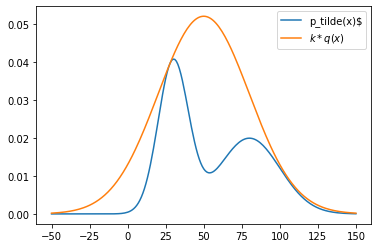

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


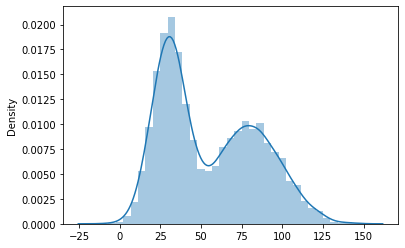

In [10]:
plt.legend()
plt.plot(x, p(x), label = 'p_tilde(x)$')
plt.plot(x, k*q(x), label = '$k*q(x)$')
plt.legend()
plt.show()
sns.distplot(s)